# Linear Regression Model: Predicting Stock Returns Based on Moving Averages

### Introduction

In this notebook, we will explore how to build a simple **linear regression model** to predict future stock returns based on technical indicators, specifically **moving averages**. Moving averages are widely used by traders and analysts to smooth out price data and identify trends over different time periods. 

### Goal
The primary objective is to use historical stock prices and their corresponding moving averages to forecast the **next day's return** or **closing price**. We will perform the following steps:
- **Load stock price data** (e.g., Apple or Tesla)
- **Calculate moving averages** for different windows (e.g., 10-day, 50-day, and 200-day)
- Use these moving averages as **input features** for a linear regression model
- **Train and test** the model to predict future returns or prices
- Evaluate the **performan# Importing Libraries and Data Preparation

In this section, we will import the necessary libraries for data manipulation, visualization, and machine learning. 

1. **Libraries**:
   - **Pandas**: For handling and analyzing tabular data, such as stock prices.
   - **NumPy**: Provides support for mathematical functions and large multi-dimensional arrays.
   - **Matplotlib**: Used for plotting graphs to visualize data.
   - **Scikit-learn**: For machine learning; we will use it for splitting data and creating the linear regression model.

2. **Data Loading**:
   - We load Apple's stock data from a CSV file and set the 'date' column as the index for easier data access.

3. **Feature Engineering**:
   - Calculate the **daily return** to show the percentage change in stock price.
   - Create a **40-day moving average** to smooth daily price fluctuations.
   - Create a **200-day moving average** for a broader performance overview.
   - Shift the daily return column to predict the **next day's return**.
   - Drop any rows with NaN values in the key columns.

4. **Data Splitting**:
   - Define the features (`X`) as the moving averages and the target (`y`) as the next day's return.
   - Split the data into training (80%) and testing (20%) sets.

5. **Model Building**:
   - Build a **linear regression model** and fit it using the training data.

This process sets up the framework for our linear regression analysis to predict stock returns based on moving averages.
ce** of the model and plot the predicted vs. actual stock prices

### Why Moving Averages?
Moving averages, such as the **10-day, 50-day, and 200-day averages**, are important technical indicators that traders often use to:
- Identify long-term trends
- Find potential entry and exit points for trades
- Filter out noise in the stock price data

By incorporating these into our linear regression model, we aim to capture the relationship between moving averages and future returns.

### Steps:
1. **Data Import and Preprocessing**: Load the stock price data and clean it for further analysis.
2. **Feature Engineering**: Calculate moving averages for different time periods and add them as new features to the dataset.
3. **Build a Linear Regression Model**: Use moving averages as input features and the next day’s return/closing price as the target variable.
4. **Model Training and Testing**: Train the linear regression model on a portion of the data and test its predictive power on the remaining data.
5. **Evaluate and Visualize Results**: Plot the predicted stock prices against the actual stock prices to assess model performance.

### Tools and Libraries
We will use the following Python libraries for this analysis:
- **Pandas**: For data manipulation and preprocessing
- **Numpy**: For mathematical operations
- **Scikit-learn**: To build and evaluate the linear regression model
- **Matplotlib/Seaborn**: For data visualization

By the end of this notebook, you'll have a better understanding of how to implement and evaluate a simple linear regression model for stock price prediction using moving averages as predictors.


# Importing Libraries and Data Preparation

In this section, we will import the necessary libraries for data manipulation, visualization, and machine learning. 

1. **Libraries**:
   - **Pandas**: For handling and analyzing tabular data, such as stock prices.
   - **NumPy**: Provides support for mathematical functions and large multi-dimensional arrays.
   - **Matplotlib**: Used for plotting graphs to visualize data.
   - **Scikit-learn**: For machine learning; we will use it for splitting data and creating the linear regression model.

2. **Data Loading**:
   - We load Apple's stock data from a CSV file and set the 'date' column as the index for easier data access.

3. **Feature Engineering**:
   - Calculate the **daily return** to show the percentage change in stock price.
   - Create a **40-day moving average** to smooth daily price fluctuations.
   - Create a **200-day moving average** for a broader performance overview.
   - Shift the daily return column to predict the **next day's return**.
   - Drop any rows with NaN values in the key columns.

4. **Data Splitting**:
   - Define the features (`X`) as the moving averages and the target (`y`) as the next day's return.
   - Split the data into training (80%) and testing (20%) sets.

5. **Model Building**:
   - Build a **linear regression model** and fit it using the training data.

This process sets up the framework for our linear regression analysis to predict stock returns based on moving averages.


In [16]:
# First, we import the necessary libraries for data manipulation, visualization, and machine learning

import pandas as pd  # Pandas is used for handling and analyzing data, especially tabular data (like stock prices)
import numpy as np   # NumPy provides support for large, multi-dimensional arrays and mathematical functions
import matplotlib.pyplot as plt  # Matplotlib is used for plotting graphs and visualizing data
from sklearn.model_selection import train_test_split  # This function helps split our data into training and testing sets
from sklearn.linear_model import LinearRegression  # This is the linear regression model, which we'll use to predict stock prices

# Load Apple's stock data from a CSV file
apple = pd.read_csv('AAPL_data.csv')

# Set the 'date' column as the index, making it easier to access data by date
apple.set_index('date', inplace=True)

# --- Feature Engineering ---

# Calculate the daily return: This shows the percentage change in the stock price from one day to the next
apple['Return'] = apple['close'].pct_change()

# Create a 40-day moving average of the 'close' price. This smooths out the daily price fluctuations to show longer trends.
apple['MA40'] = apple['close'].rolling(window=40).mean()

# Create a 200-day moving average of the 'close' price, which gives a broader view of the stock's performance over time.
apple['MA200'] = apple['close'].rolling(window=200).mean()

# Shift the 'Return' column to predict the next day's return
# We are shifting the returns by one day because we want to "predict" the future return using today's data.
# In reality, we can't know tomorrow's return in advance, but in this model, we are using past data to "train" the model.
apple['Return_next_day'] = apple['Return'].shift(-1)

# Drop rows where any of the key columns contain NaN values
apple.dropna(subset=['MA40', 'MA200', 'Return_next_day'], inplace=True)

# Define features and target (the variables used in the prediction)
# X (features): We are using the 40-day and 200-day moving averages as the inputs to predict the stock's behavior
X = apple[['MA40', 'MA200']]

# y (target): The 'Return_next_day' column, which is the stock's return for the next day, is what we're trying to predict
y = apple['Return_next_day']

# Split the data into training and testing sets
# 80% of the data will be used to train the model, and 20% will be used to test it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
# Linear regression will try to find a relationship between the moving averages (X) and the next day's return (y)
model = LinearRegression()

# Fit the model (train it) using the training data
model.fit(X_train, y_train)




LinearRegression()

# Making Predictions and Generating Buy/Sell Signals

In this section, we will use the trained linear regression model to predict the next-day return for the stock based on the moving averages.

1. **Predicted Returns**: 
   - We add a new column, `Predicted_Return`, to the DataFrame that contains the model's predictions for all data points.

2. **Generating Buy/Sell Signals**: 
   - A new column, `Signal`, is created to indicate trading actions:
     - A positive predicted return (> 0) signals to **Buy** (indicated by 1).
     - A negative predicted return (<= 0) signals to **Sell** (indicated by -1).

3. **Result**:
   - The updated DataFrame is displayed, showing the predicted returns alongside the generated trading signals.


In [19]:
# Use the trained model to predict the stock's next-day return for all data
apple['Predicted_Return'] = model.predict(X)  # X contains the moving averages (MA40, MA200)

# Create a "Signal" column that tells us when to buy or sell
# If the predicted return is positive (> 0), it signals to "Buy" (1)
# If the predicted return is negative (<= 0), it signals to "Sell" (-1)
apple['Signal'] = np.where(apple['Predicted_Return'] > 0, 1, -1)

# Show the updated DataFrame with the predictions and signals
apple


,open,high,low,close,volume,Name,Return,MA40,MA200,Return_next_day,Predicted_Return,Signal,Strategy_Return,Cumulative_Strategy_Return,Cumulative_Market_Return
date,,,,,,,,,,,,,,,
2013-11-21,73.9428,74.4585,73.3814,74.4479,65506861,AAPL,0.011914,72.792715,65.670352,-0.002563,0.001411,1,NaN,NaN,1.011914
2013-11-22,74.2171,74.5942,74.0756,74.2571,55931232,AAPL,-0.002563,72.925038,65.702366,0.007579,0.001412,1,-0.002563,0.997437,1.009320
2013-11-25,74.4314,75.1242,74.4285,74.8199,57348403,AAPL,0.007579,73.092857,65.733659,0.018444,0.001414,1,0.007579,1.004997,1.016970
2013-11-26,74.8742,76.5914,74.8571,76.1999,100345728,AAPL,0.018444,73.255143,65.780444,0.023547,0.001415,1,0.018444,1.023533,1.035727
2013-11-27,76.6156,77.9999,76.1999,77.9942,90861841,AAPL,0.023547,73.456570,65.836838,0.018518,0.001416,1,0.023547,1.047635,1.060116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-31,166.8700,168.4417,166.5000,167.4300,32478930,AAPL,0.002755,173.022250,159.279100,0.002090,0.000614,1,0.002755,2.248955,2.275748
2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,0.002090,172.971750,159.412000,-0.043390,0.000610,1,0.002090,2.253657,2.280506
2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,-0.043390,172.743250,159.511100,-0.024984,0.000605,1,-0.043390,2.155870,2.181554


# Making Predictions and Generating Buy/Sell Signals

In this section, we will utilize our trained linear regression model to predict the next-day stock return based on moving averages. 

- **Predicted Returns**: A new column, `Predicted_Return`, is added to the DataFrame to store the model's predictions.
- **Signal Generation**: 
  - A `Signal` column is created to guide trading decisions:
    - **Buy** (1) for positive predicted returns.
    - **Sell** (-1) for negative predicted returns.
  
The updated DataFrame will display these predicted returns and the corresponding trading signals.


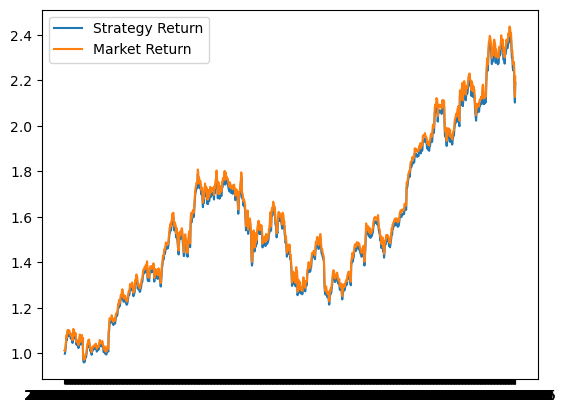

In [18]:
# Calculate the return of the strategy
# Shift the 'Signal' by 1 because you can only act on the buy/sell signal the day after it's generated
# Multiply the previous day's signal (buy/sell) by the current day's return to get the strategy's return
apple['Strategy_Return'] = apple['Signal'].shift(1) * apple['Return']

# Calculate the cumulative return of the strategy
# Multiply each day's return by the previous ones (cumulative product) to see how the strategy performs over time
apple['Cumulative_Strategy_Return'] = (1 + apple['Strategy_Return']).cumprod()

# Calculate the cumulative return of the market (buy and hold)
apple['Cumulative_Market_Return'] = (1 + apple['Return']).cumprod()

# Plot the cumulative strategy return vs. the cumulative market return
plt.plot(apple['Cumulative_Strategy_Return'], label='Strategy Return')
plt.plot(apple['Cumulative_Market_Return'], label='Market Return')
plt.legend()  # Add a legend to show which line is the strategy and which is the market
plt.show()  # Display the plot



# Applying the Model to Tesla Stock

Now, you will replicate the same analysis and modeling process for Tesla stock. Follow the steps below:

1. **Load Tesla Stock Data**: 
   - Import the Tesla stock data from a CSV file (e.g., `TSLA_data.csv`).
   - Ensure to set the 'date' column as the index.

2. **Feature Engineering**: 
   - Calculate the daily returns and create moving averages (40-day and 200-day) for the closing price.
   - Shift the 'Return' column to prepare for predicting the next day's return.
   - Drop any rows with missing values in the relevant columns.

3. **Define Features and Target**: 
   - Set `X` to the moving averages (`MA40` and `MA200`) and `y` to the shifted 'Return_next_day'.

4. **Split the Data**: 
   - Split the data into training and testing sets, with 80% for training and 20% for testing.

5. **Build and Train the Model**: 
   - Create a linear regression model and fit it using the training data.

6. **Make Predictions**: 
   - Use the model to predict next-day returns for all data points in the Tesla dataset.
   - Generate a new column `Predicted_Return` to store these predictions.

7. **Generate Trading Signals**: 
   - Create a `Signal` column based on the predicted returns:
     - Assign 1 for predicted returns greater than 0 (Buy).
     - Assign -1 for predicted returns less than or equal to 0 (Sell).

8. **Display Results**: 
   - Show the updated DataFrame with the predicted returns and trading signals.

By completing these steps, you'll gain hands-on experience applying linear regression to stock price predictions for Tesla, just as you did for Apple.
